# 인스타 크롤링

### 1. 인스타그램 접속 후 로그인하기

https://www.instagram.com/explore/tags/%EC%A0%9C%EC%A3%BC%EB%8F%84%EB%A7%9B%EC%A7%91/

tag/{검색어}

로그인을 해야만 게시물을 볼 수 있도록 인스타그램 운영 정책이 변경되었습니다(2020.04.27)
직접 브라우저에 계정 정보를 입력해도 되고, 코드를 이용해도 됩니다

In [1]:
from selenium import webdriver
driver = webdriver.Chrome('../driver/chromedriver.exe')

In [2]:
import time
driver.get('https://www.instargram.com')
time.sleep(2)

크롬창에서 고급--> 인스타그램 허용

In [4]:
email = 'dddu_light' #id
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = 'Aapfhd135zz' #pw
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(3)

### 인스타그램 검색결과 URl 만들어서 접속하기

In [5]:
#{키워드} : 제주도맛집/독도/강원도여행...
#'https://www.instagram.com/explore/tags/{키워드}/'

def insta_searching(word):
    
    url = 'https://www.instagram.com/explore/tags/' + word
    return url

In [6]:
word = '제주도맛집'
url = insta_searching(word)
driver.get(url)

#### 첫 번째 게시글 열기

In [7]:
def select_first(driver):
    first = driver.find_element_by_css_selector('div._9AhH0')
    first.click()
    time.sleep(3)
    
select_first(driver)

#### 게시글 정보 가져오기

In [11]:
import re #정규표현식
from bs4 import BeautifulSoup
import unicodedata #유니코드 데이터 ==> 한글

# 본문 내용, 작성 일시, 위치 정보를 가져옴

In [12]:
def get_content(driver):
    html = driver.page_source
    soup = BeautifulSoup(html,'lxml') #html -> lxml파서로 파싱
    # 본문내용
    # 본문내용이 없을까봐 예외처리 합니다
    try:
    # 태그명이 div이고, class명이 C4VMK인 태그 아래에 있는 span 태그를 모두 선택
        content = soup.select('div.C4VMK > span')[0].text
        content = unicodedata.normalize('NFC', content)
        # 본문내용 -> 저장할때 깨질까봐 넣는 것(자음/모음처리)
    except:
    #인스타 게시물 중 본문이 존재하지 않는 경우 에러 발생하므로 빈 값으로 저장
        content = ' ' 
        
    # 본문내용 중 해시태그 가져오기(정규식 활용)
    # content 본문 내용 중에서 #으로 시작, #뒤에 연속된 문자(공백, #, \) 아닌경우
    # 리스트 형태로 tag변수에 저장
    tags = re.findall(r'#[^\s#,\\]+', content) 
    
    #작성일자(년월 정보)
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    
    #위치정보(정보가 빠진게 많아요..)
    try:
        place = soup.select('div.M30cS')[0].text
        place = unicodedata.normalize('NFC', place)
    except:
        place = ' '
        
    # 좋아요 수 가져오기
    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]  #숫자만 39
    except:
        like = 0
        
    # 수집한 정보 저장
    data = [content, date, like, place, tags]
    return data

get_content(driver)

['부드러운 갈치가 통으로 들어가서비주얼부터 끝내줬던 #중문수원음식점 의통갈치조림👍👍통문어랑 왕새우, 전복까지 있어서젓가락을 어디에 둬야할지...하나하나 다 맛있어서배 부르게 먹고왔당👍👍.#제주맛집 #제주도맛집 #중문갈치조림 #제주중문맛집 #중문갈치조림맛집 #중문맛집추천 #중문관광단지맛집 #제주도갈치조림맛집 #제주갈치조림 #서귀포맛집추천',
 '2020-12-18',
 0,
 '',
 ['#중문수원음식점',
  '#제주맛집',
  '#제주도맛집',
  '#중문갈치조림',
  '#제주중문맛집',
  '#중문갈치조림맛집',
  '#중문맛집추천',
  '#중문관광단지맛집',
  '#제주도갈치조림맛집',
  '#제주갈치조림',
  '#서귀포맛집추천']]

In [ ]:
 _65Bje  coreSpriteRightPaginationArrow

### 다음 게시글 열기

In [14]:
def move_next(driver):
    right = driver.find_element_by_css_selector('a.coreSpriteRightPaginationArrow')
    right = driver.find_element_by_css_selector('a._65Bje.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(3)
    
move_next(driver)

## 여러 게시글 정보 수집하기

In [16]:
# 인스타그램 검색페이지 URL 만들기
word = '제주도맛집' # 검색어
url = insta_searching(word)

driver.get(url)
time.sleep(3)

# 첫번째 게시글 열기
select_first(driver)

# 비어있는 변수(results)만들기
results = []

#여러 게시글 수집하기
target = 100 # 크롤링 할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시(네트워크 문제 등의 이유로)
    # 2초 대기 후, 다음 게시글로 넘어가도록, try, except
    try:
        data = get_content(driver) # 게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
        
print(results[:2])

[['부드러운 갈치가 통으로 들어가서비주얼부터 끝내줬던 #중문수원음식점 의통갈치조림👍👍통문어랑 왕새우, 전복까지 있어서젓가락을 어디에 둬야할지...하나하나 다 맛있어서배 부르게 먹고왔당👍👍.#제주맛집 #제주도맛집 #중문갈치조림 #제주중문맛집 #중문갈치조림맛집 #중문맛집추천 #중문관광단지맛집 #제주도갈치조림맛집 #제주갈치조림 #서귀포맛집추천', ['#중문수원음식점', '#제주맛집', '#제주도맛집', '#중문갈치조림', '#제주중문맛집', '#중문갈치조림맛집', '#중문맛집추천', '#중문관광단지맛집', '#제주도갈치조림맛집', '#제주갈치조림', '#서귀포맛집추천'], '2020-12-18', 0, ''], ['<광고>.섬마을청년회관에서즐기는 특별한 메뉴!고사리 파스타와 전복게우밥흑돼지돈까스까지!독특하면서도 맛있는이색 맛집을 찾는다면 꼭 한번 방문해야할 곳!제주공항과도 가까워 더욱 굳굳👍👍.#제주도맛집#제주맛집#도두무지개해안도로#제주도민추천#제주돈까스#제주시내맛집#제주도파스타#제주용두암맛집#제주공항근처맛집추천#탑동맛집#제주레스토랑#제주도용두암맛집', ['#제주도맛집', '#제주맛집', '#도두무지개해안도로', '#제주도민추천', '#제주돈까스', '#제주시내맛집', '#제주도파스타', '#제주용두암맛집', '#제주공항근처맛집추천', '#탑동맛집', '#제주레스토랑', '#제주도용두암맛집'], '2020-12-18', '1,559', '']]


In [22]:
# 크롤링 저장

import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content','tags','date','like','place']
results_df.to_excel('../data/crawling_jejudo.xlsx')

### 여러 엑셀 파일의 중복을 제거한 후 통합 저장

In [26]:
# 여러 개의 저장파일 통합하기
jeju_insta_df = pd.DataFrame( [ ])

f_list = ['../data/1_crawling_jejudoMatJip.xlsx', 
          '../data/1_crawling_jejudoGwanGwang.xlsx', 
          '../data/1_crawling_jejuMatJip.xlsx', 
          '../data/1_crawling_jejuYeoHang.xlsx']

for fname in f_list:
    fpath = fname
    print(fpath)
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)

    
jeju_insta_df.columns == ['content','data','like','place','tags']

../data/1_crawling_jejudoMatJip.xlsx
../data/1_crawling_jejudoGwanGwang.xlsx
../data/1_crawling_jejuMatJip.xlsx
../data/1_crawling_jejuYeoHang.xlsx


array([ True, False,  True,  True,  True])

In [28]:
# 중복데이터 제거하고 저장
jeju_insta_df.drop_duplicates(subset = ['content'], inplace = True)
print(jeju_insta_df)
jeju_insta_df.to_excel('../data/1_crwaling_raw.xlsx', index = True)

                                                content        date like  \
0     제주도 도착~~공항근처 #제주분식 에서 먹은 첫식사만족만족!#제주맛집#제주도맛집#제...  2019-01-01  705   
1     ﻿#함덕맛집 무거버거 바다 보면서 먹으니까 더 꿀맛👍🏻 #제주도카페투어#제주일상#함...  2019-01-01  384   
2     .대만족 제주스!.#동문시장#제주동문시장#제주도기념품#제주기념품#제주스는완벽#제주도...  2019-01-01  595   
3     #제주여행#2일차무거버거 제주와서 먹은것중에 제일 맛있었음!#제주도여행#제주맛집#함...  2019-01-01  412   
4     🥇1월 영업 안내🥇-1월 2일, 3일(수,목)은 쉬어갑니다-1월 4일,5일,6일(금...  2019-01-01  364   
...                                                 ...         ...  ...   
1702  Now it's purple😆💜수색 넘 이쀼리 🤭 올해는 아퓨지말구 즐거운 일만 가...  2019-01-01   42   
1703  .간다간다간다#제주 #친정여행 #겨울방학 #제주여행앞머리는 괜히 전날 잘라서 또순이...  2019-01-01   50   
1705  2019년 모두 복 많이많이 받고 풍요로운 한해 보내길 ♥️#사진좀찍으시는님덕에건져...  2019-01-01   68   
1706  2018.12.25 ⠀룸에 의자가 두개 밖에 없어서 ⠀이현이는 유모차에 앉아서 식사...  2019-01-01   70   
1707  .2019년 첫날디스이즈핫에서 새해를 맞이하시는 손님들께 떡국을 준비했습니다.한 해...  2019-01-01   48   

       place                                               tags  
0        NaN  ['#제주분식

## 워드클라우드

### 해시태그 데이터 불러오기

In [43]:
# 크롤링 결과 중 해시태그 데이터 불러오기
import pandas as pd
raw_total = pd.read_excel('../data/1_crawling_raw.xlsx')
raw_total['tags'][:3]

0    ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
1    ['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#...
2    ['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',...
Name: tags, dtype: object

In [31]:
# 해시태그 통합 저장하기

tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)
        
tags_total

['#제주핫플레이스',
 '#제주여행',
 '#제주여행',
 '#제주도여행',
 '#제주가볼만한곳',
 '#제주도핫플',
 '#제주여행코스',
 '#제주공항',
 '#제주도맛집',
 '#제주맛집',
 '#제주스냅',
 '#제주풍경',
 '#제주사진',
 '#제주카페',
 '#제주도카페',
 '#산굼부리',
 '#제주도바다',
 '#귤체험',
 '#우도',
 '#제주관광',
 '#제주도여향지',
 '#제주여행중',
 '#삼육오빠',
 '#제주앓이',
 '#제주핫플',
 '#제주여행',
 '#제주',
 '#제주도',
 '#제주도맛집',
 '#제주맛집',
 '#여행',
 '#제주맛집추천',
 '#맛집추천',
 '#제주공항',
 '#제주카페',
 '#제주디저트맛집',
 '#제주데이트',
 '#제주데이트코스',
 '#제주도여행',
 '#고집돌우럭',
 '#중문맛집',
 '#제주여행중',
 '#감귤카페',
 '#제주카페추천',
 '#제주야시장',
 '#맛집',
 '#제주갈만한곳',
 '#제주관광',
 '#좋아요반사',
 '#좋반',
 '#제주도여행지',
 '#제주도가볼만한곳',
 '#제주여행코스',
 '#honestin',
 '#어니스틴',
 '#제주여행',
 '#제주',
 '#제주도',
 '#제주도여행',
 '#제주살이',
 '#제주도민',
 '#제주가볼만한곳',
 '#제주일상',
 '#제주도가볼만한곳',
 '#제주핫플레이스',
 '#제주핫플',
 '#제주라이프',
 '#가을제주',
 '#제주시',
 '#제주여행코스',
 '#제주도핫플',
 '#제주오름',
 '#들렁모루',
 '#비밀의정원',
 '#삼굼부리',
 '#정물오름',
 '#자연생태마을',
 '#오조포구',
 '#올레길',
 '#제주하늘',
 '#제주관광',
 '#11월여행',
 '#제주관광',
 '#제주살이',
 '#제주이주민',
 '#아라동주민',
 '#삼남매집',
 '#새해첫날',
 '#드라이브',
 '#명월국민학교',
 '#낙서',
 '#잡히면죽는다',
 '#제주관광',
 '#제주',
 '#돔나이트',

### 해시태그의 출현 빈도 집계

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

font_name = 'malgun gothic'
rc('font', family=font_name)

In [32]:
# 빈도수 집계하기(Counter)
from collections import Counter
tag_counts = Counter(tags_total)

In [33]:
#가장 많이 사용된 해시태그 살펴보기
tag_counts.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도', 2096),
 ('#제주', 1567),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#jeju', 776),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#일상', 717),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('', 588),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#선팔', 522),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주눈썹문신', 472),
 ('#제주도관광', 471),
 ('#서귀포눈썹문신', 458),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#반영구', 443),
 ('#눈썹문신', 443),
 ('#제주자연눈썹', 435),
 ('#제주속눈썹', 435)]

In [34]:
# 데이터 정재하기
STOPWORDS = ['#일상','#선팔','#제주도','#jeju','#반영구','#제주자연눈썹',
            '#서귀포눈썹문신','제주눈썹문신','#소통','#맞팔']

tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        

tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주', 1567),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('', 588),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주눈썹문신', 472),
 ('#제주도관광', 471),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#눈썹문신', 443),
 ('#제주속눈썹', 435),
 ('#서귀포남자눈썹문신', 433),
 ('#서귀포자연눈썹', 433),
 ('#제주남자눈썹문신', 433),
 ('#서귀포속눈썹', 433),
 ('#서귀포반영구', 433),
 ('#제주스타그램', 432),
 ('#제주일상', 424)]

In [35]:
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags','counts']

<AxesSubplot:xlabel='counts', ylabel='tags'>

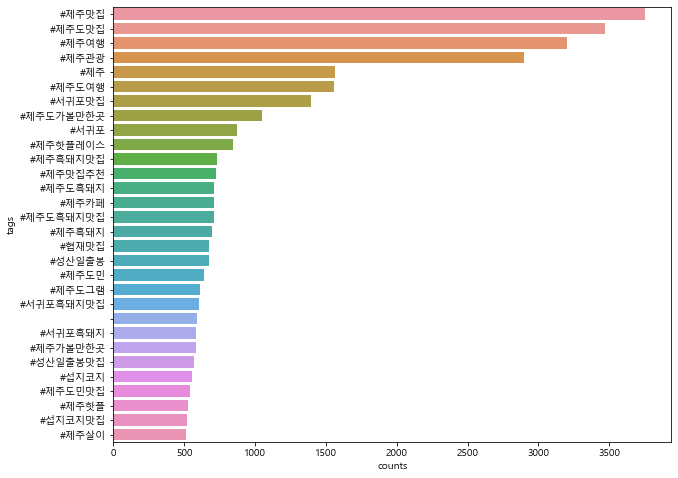

In [39]:
plt.figure(figsize=(10,8))
sns.barplot(x='counts', y='tags', data=tag_counts_df)

### 워드클라우드 그리기

In [40]:
from wordcloud import WordCloud
import platform
font_path = 'c:/Windows/Fonts/malgun.ttf'

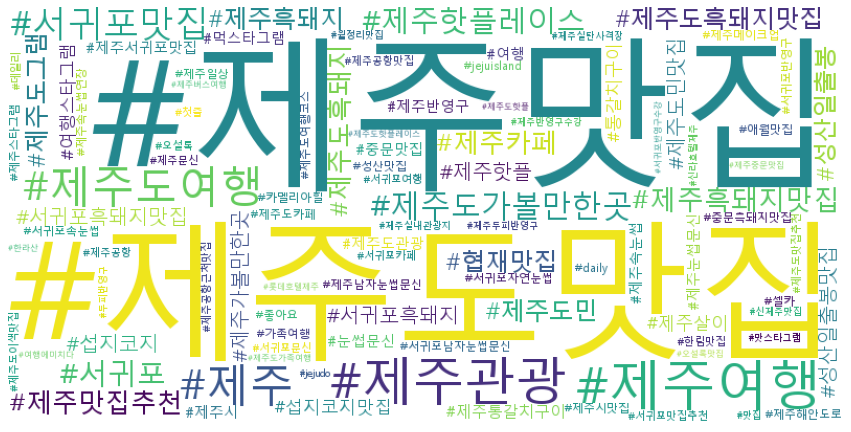

In [41]:
wordcloud = WordCloud(font_path = font_path,
                     background_color = 'white',
                     max_words = 100,
                     relative_scaling=0.3,
                     width=800,
                     height=400).generate_from_frequencies(tag_counts_selected)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('../data/2_tag-wordcloud.png')